In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import random

In [22]:
# read pd
df1 = pd.read_csv('MN_selected.csv')
df1

,id,AssessTot,BldgArea,LotFront,YearBuilt,CommFAR,MedIncome,IfAlter,Central Harlem,Chelsea & Clinton,...,LandUse_8,LandUse_9,LandUse_10,OwnerType_C,OwnerType_M,OwnerType_O,OwnerType_P,OwnerType_X,Zone,LandUse
0,0,156510900,2725731,0.00,1900,0.0,119691,0,0,0,...,1,0,0,0,0,0,1,0,L Manhattan,8
1,1,12197250,541886,500.00,1900,0.0,119691,0,0,0,...,1,0,0,0,0,0,0,1,L Manhattan,8
2,6,25390080,158197,311.00,1900,3.4,119691,1,0,0,...,0,0,0,1,0,0,0,0,L Manhattan,7
3,8,17134650,24346,793.67,1987,3.4,119691,0,0,0,...,0,0,0,1,0,0,0,0,L Manhattan,7
4,9,129665250,945425,323.00,1951,0.0,119691,0,0,0,...,0,1,0,1,0,0,0,0,L Manhattan,9
5,19,327600,4104,19.00,1920,15.0,119691,0,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
6,22,943650,7475,36.17,1935,15.0,119691,0,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
7,26,535090,7485,28.42,1900,15.0,119691,0,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
8,29,6046650,46724,78.92,1950,15.0,119691,1,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,5
9,33,138236850,845018,211.33,1970,15.0,119691,1,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,5


In [24]:
df2 = pd.read_csv('MN with additional features.csv')

## Currently we are underfitting land with low values.

In [25]:
df2[np.log(df2['AssessTot'])<10]

,Unnamed: 0,ZipCode,Zone,Address,LandUse,LandUseStr,OwnerType,LotArea,BldgArea,NumBldgs,...,MedIncome,AvgIncome,PerCapitaIncome,HighIncomeHouse,NumofHouses,NumofCondos,EduRate,UnemployedRate,MarriedRate,DivorcedRate
1335,3438,10009,L. East Side,356 EAST 8 STREET,2,Multi Faml.,P,1804,2928,1,...,59090,85207,44839,0.094,31531,27731,0.850,0.056,0.555,0.091
1426,3613,10009,L. East Side,219 EAST 3 STREET,1,1&2 Faml.,P,2251,775,2,...,59090,85207,44839,0.094,31531,27731,0.850,0.056,0.555,0.091
1474,3680,10009,L. East Side,629 EAST 6 STREET,4,Resi. & Cml.,P,2271,6985,1,...,59090,85207,44839,0.094,31531,27731,0.850,0.056,0.555,0.091
1538,3787,10009,L. East Side,167 AVENUE B,2,Multi Faml.,P,1767,7150,1,...,59090,85207,44839,0.094,31531,27731,0.850,0.056,0.555,0.091
8518,29171,10029,East Harlem,1679 MADISON AVENUE,4,Resi. & Cml.,P,1079,4100,1,...,31350,60756,25697,0.046,32559,28248,0.755,0.121,0.279,0.088
8658,29477,10029,East Harlem,105 EAST 101 STREET,1,1&2 Faml.,P,1162,2320,1,...,31350,60756,25697,0.046,32559,28248,0.755,0.121,0.279,0.088
8685,29512,10029,East Harlem,107 EAST 101 STREET,1,1&2 Faml.,P,1162,2320,1,...,31350,60756,25697,0.046,32559,28248,0.755,0.121,0.279,0.088
8835,29763,10029,East Harlem,161 EAST 107 STREET,2,Multi Faml.,P,1716,5100,1,...,31350,60756,25697,0.046,32559,28248,0.755,0.121,0.279,0.088
8854,29807,10029,East Harlem,1739 LEXINGTON AVENUE,2,Multi Faml.,P,1083,4415,1,...,31350,60756,25697,0.046,32559,28248,0.755,0.121,0.279,0.088
8859,29818,10029,East Harlem,178 EAST 109 STREET,2,Multi Faml.,P,1850,3880,1,...,31350,60756,25697,0.046,32559,28248,0.755,0.121,0.279,0.088


In [20]:
# for i in range(len(df.columns)):
#     print (i,df.columns[i])

In [3]:
# convert to np
data = df.as_matrix()

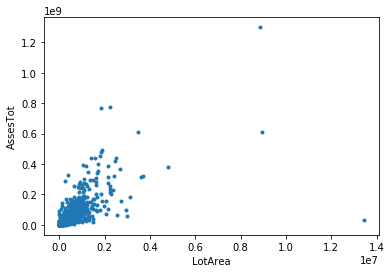

In [5]:
# plotting
plt.plot(data[:,2],data[:,1],'.')
plt.xlabel('LotArea')
plt.ylabel('AssesTot')
plt.show()

In [4]:
# log scale AssessTot
data[:,1] = np.log(1.0*np.hstack(data[:,1]))

In [5]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 10)
    upper_bound = quartile_3 + (iqr * 10)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [6]:
# remove outliers
index = np.zeros(len(data))
for i in range(1,7):
    index[outliers_iqr(data[:,i])] = 1
data = data[np.where(index==0)]

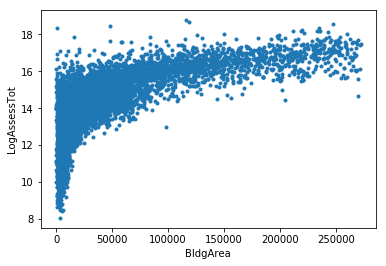

In [9]:
# plotting
plt.plot(data[:,2],data[:,1],'.')
plt.xlabel('BldgArea')
plt.ylabel('LogAssessTot')
plt.show()

C:\Users\dancyfang\.julia\v0.6\Conda\deps\usr\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


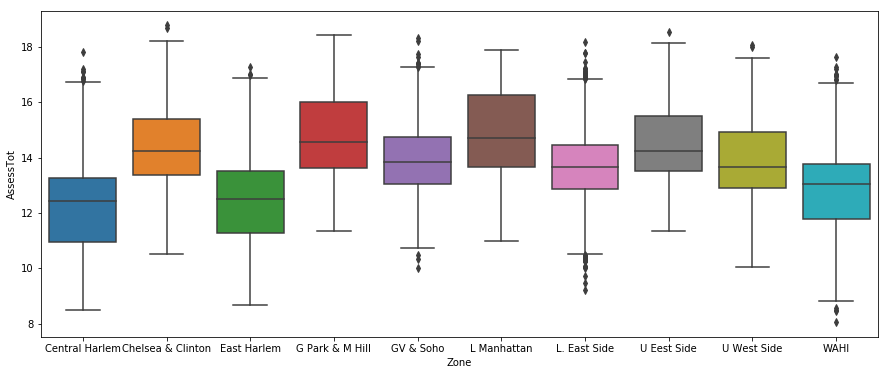

In [10]:
import seaborn as sns
# sns.set(style="ticks")
plt.figure(figsize=(15,6))
plt.xlabel('Zone')
plt.ylabel('AssessTot')
sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8,order=[u'Central Harlem', u'Chelsea & Clinton', u'East Harlem', u'G Park & M Hill', u'GV & Soho', u'L Manhattan',u'L. East Side', u'U Eest Side', u'U West Side', u'WAHI'])
# sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8)
plt.show()

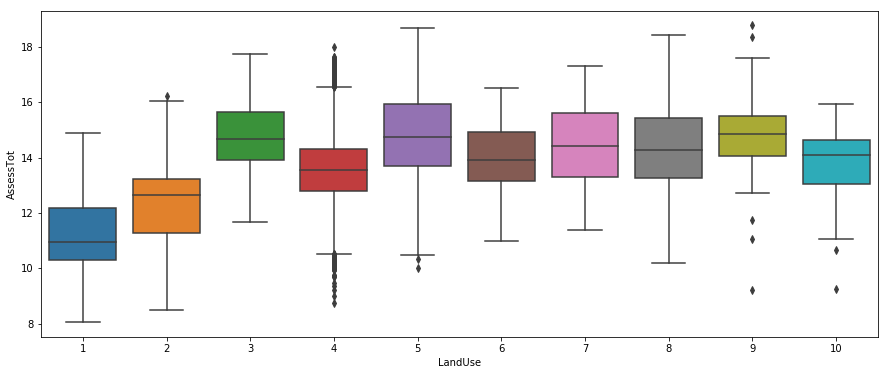

In [11]:
plt.figure(figsize=(15,6))
plt.xlabel('LandUse')
plt.ylabel('AssessTot')
sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,34]),width=0.8)
plt.show()

In [12]:
# # scaling
# data = data[:,1:33].astype(float)
# temp = data[:,:6]
# temp = (temp - temp.min(axis = 0))/(temp.max(axis=0)-temp.min(axis = 0))
# data = np.hstack((temp,data[:,6:]))
# # adding offset
# data = np.hstack((data,np.ones((len(data),1))))

In [7]:
# scaling
data = data[:,1:33].astype(float)
temp = data[:,1:6]
temp = (temp - temp.min(axis = 0))/(temp.max(axis=0)-temp.min(axis = 0))
# scaler = StandardScaler()
# scaler.fit(np.reshape(data[:,0],(len(data[:,0]),1)))
# temp = scaler.transform(temp)
data = np.hstack((np.column_stack((data[:,0],temp)),data[:,6:]))
# adding offset
data = np.hstack((data,np.ones((len(data),1))))

In [13]:
data[0,:]

array([ 17.0498691 ,   0.58136356,   0.52181208,   0.53784861,
         0.22666667,   0.41453969,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   0.        ,   1.        ])

In [8]:
# partitioning, randomly select 80% samples as traininig set, 20% as test set
n = int(len(data)*0.8)
trainset = random.sample(range(len(data)),n)
testset = [i for i in range(len(data)) if i not in trainset]
X = data[trainset,1:]
Y = data[trainset,0]
X_test = data[testset,1:]
Y_test = data[testset,0]

In [9]:
# coefficient plot
def coef_plot(w):
    plt.bar(range(len(w)),w)
    plt.xlabel('predictors')
    plt.ylabel('coefficients')
    plt.title('regression results - coefficients')
    plt.show()

In [10]:
# true value, predicted value
def pred_value_plot(Y,Y_pred):
    plt.figure(figsize=(5,5))
#     plt.plot(np.exp(Y),np.exp(Y_pred),'.')
#     plt.plot(np.exp(Y),np.exp(Y))
    plt.plot(Y,Y_pred,'.')
    plt.plot(Y,Y)
#     plt.xscale('log')
#     plt.yscale('log')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.title('predicted value vs true value of test set')
    plt.show()

In [11]:
# residual plot
def residual_plot(Y,Y_pred):
    plt.plot(Y_pred,Y-Y_pred,'.')
    plt.plot([0.2,1.2],[0,0])
    plt.xlabel('fitted value')
    plt.ylabel('residual')
    plt.show()

## L2 loss, no reg, package

In [13]:
# l2 loss, no regularizor, python linear regression package
# create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)
# train the model
regr.fit(X,Y)
# test the model
Y_pred = regr.predict(X)
Y_test_pred = regr.predict(X_test)
# the coefficients
np.set_printoptions(precision=4, suppress=True)
print('coefficients:', regr.coef_)
# mean squared error
print('mean_squared_error train: %.4f' % mean_squared_error(Y,Y_pred))
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

('coefficients:', array([ 3.4685,  4.2389,  1.1597,  0.5898,  1.2431,  0.2643,  0.2348,
        1.0974,  0.2438,  1.1461,  0.963 ,  0.5124,  1.0194,  1.4426,
        1.107 ,  0.4735, -0.648 ,  0.4331,  1.2391,  0.9841,  1.3352,
        1.0165,  0.6383,  1.1814,  1.0409,  1.0193,  1.8495,  1.1237,
        1.7906,  1.7183,  1.758 ,  8.2401]))
mean_squared_error train: 0.6962
mean_squared_error test: 0.7043


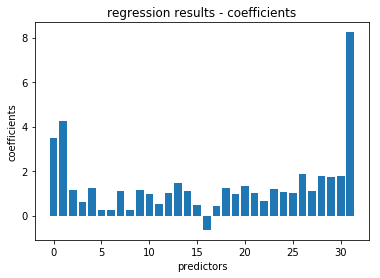

In [14]:
coef_plot(regr.coef_)

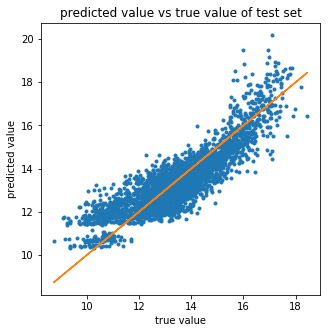

In [15]:
pred_value_plot(Y_test,Y_test_pred)

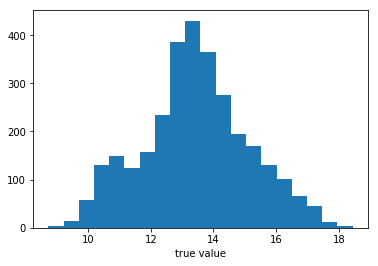

In [16]:
plt.hist(Y_test,bins=20)
plt.xlabel('true value')
plt.show()

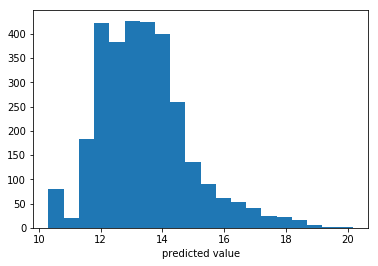

In [17]:
plt.hist(Y_test_pred,bins=20)
plt.xlabel('predicted value')
plt.show()

We have a lot of predicted values between 12-14 because we have three categorical transferred dummis.

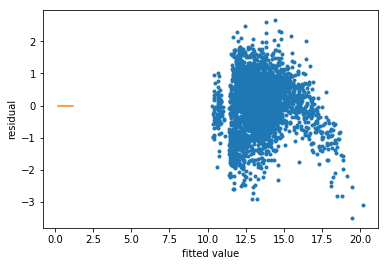

In [18]:
residual_plot(Y_test,Y_test_pred)

## L2 loss, no reg

In [43]:
# l2 loss, no regularizor, solve to the end
w = np.dot(np.linalg.pinv(X),Y)
Y_test_pred = np.dot(X_test,w)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

mean_squared_error test: 0.7386


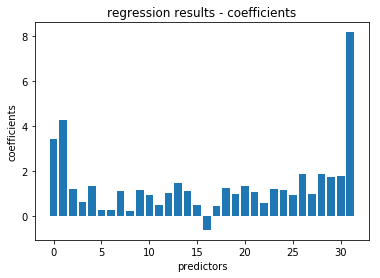

In [44]:
coef_plot(w)

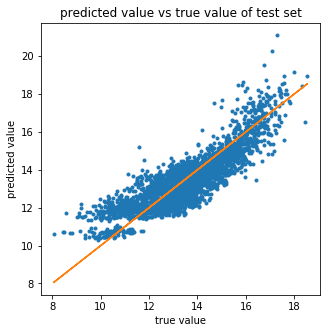

In [45]:
pred_value_plot(Y_test,Y_test_pred)

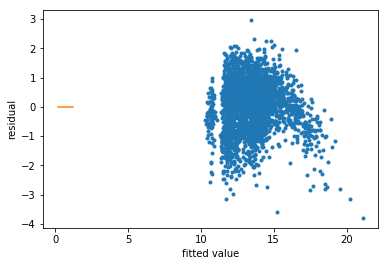

In [46]:
residual_plot(Y_test,Y_test_pred)

## L2 loss, lasso reg

In [49]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
alpha_list = [0.0005,0.001,0.005,0.01]
error = np.zeros(len(alpha_list))
for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    lasso = linear_model.Lasso(alpha=alpha, fit_intercept=False, normalize=False, max_iter=1000)
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        lasso.fit(Xv_train,Yv_train)
        error[i] += mean_squared_error(Yv_test,lasso.predict(Xv_test))
error = error/(K*1.0)
error


array([ 0.6924,  0.6963,  0.6995,  0.7144])

In [81]:
lasso = linear_model.Lasso(alpha=0.0005, fit_intercept=False, normalize=False, max_iter=1000)
# lasso = linear_model.Lasso(alpha=alpha_list[np.argmin(error)], fit_intercept=False, normalize=False, max_iter=5000)
lasso.fit(X,Y)
Y_test_pred = lasso.predict(X_test)
mean_squared_error(Y_test,Y_test_pred)

0.73988189684901784

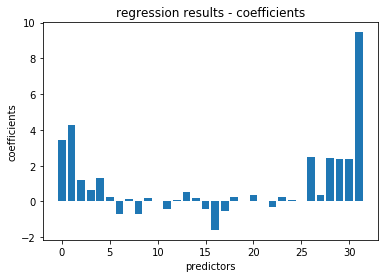

In [51]:
coef_plot(lasso.coef_)

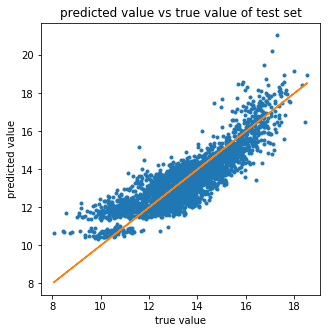

In [52]:
pred_value_plot(Y_test,Y_test_pred)

## L2 loss, smooth reg

In [53]:
# regression with regularization
# objective function of l2 loss smooth regularizor
def l2_smooth(w,X,Y,D,alpha=1.0):
     return mean_squared_error(Y,np.dot(X,w)) + alpha*np.square(np.linalg.norm(np.dot(D,w)))
# used to generate the D matrix in smooth regularizor 
def Dmatrix(n):
    r = 0
    t = np.zeros((n*(n-1)/2,n))
    for i in range(n-1):
        for j in range(i+1,n):
            t[r,i] = 1
            t[r,j] = -1
            r += 1
    return t

In [54]:
# stepsize for proximal gradient
U,s,V = np.linalg.svd(X)
step = 1.0/(2.0*np.square(s[0]))
# initial w
w0 = np.zeros(np.shape(X)[1])
# D matrix for smooth regularizor
D = np.zeros((100,np.shape(X)[1]))
D[0:45,6:16] = Dmatrix(10)
D[45:90,16:26] = Dmatrix(10)
D[90:100,26:31] = Dmatrix(5)

In [55]:
# smooth proximator
def prox_smooth(stepsize,alpha,D,z):
    return np.dot(np.linalg.inv(2.0*stepsize*alpha*np.dot(D.T,D) + np.eye(np.shape(D)[1])),z)
# l2_smooth proximal gradient method
def proxi_grad_l2_smooth(X,Y,D,alpha,maxiters=50,stepsize=step,w=w0):
    obj = []
    for i in range(maxiters):
        g = 2.0*np.dot(X.T,np.dot(X,w)-Y)
        z = w - stepsize*g
        w = prox_smooth(stepsize,alpha,D,z)
        obj.append(l2_smooth(w,X,Y,D,alpha))
    return obj,w

In [58]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
alpha_list = [30.0,50.0,70.0]
error = np.zeros(len(alpha_list))
for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        obj,w = proxi_grad_l2_smooth(Xv_train,Yv_train,D,alpha)
        error[i] += mean_squared_error(Yv_test,np.dot(Xv_test,w))
error = error/(K*1.0)
error

array([ 0.9976,  0.9947,  0.9973])

In [60]:
np.argmin(error)

1

In [61]:
obj,w = proxi_grad_l2_smooth(X,Y,D,alpha_list[np.argmin(error)],maxiters=500)
Y_test_pred = np.dot(X_test,w)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

mean_squared_error test: 0.7977


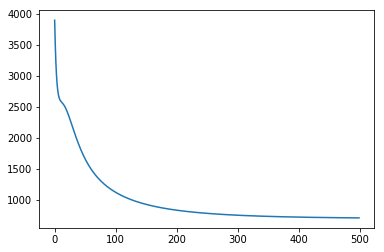

In [62]:
plt.plot(range(500),obj)
plt.show()

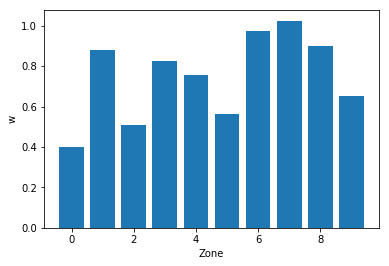

In [63]:
# smoothed coefficients for zones 
plt.bar(range(10),w[6:16])
plt.xlabel('Zone')
plt.ylabel('w')
plt.show()

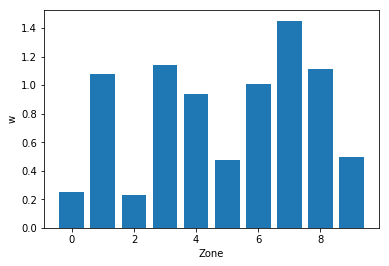

In [64]:
# original coefficients for zones
plt.bar(range(10),regr.coef_[6:16])
plt.xlabel('Zone')
plt.ylabel('w')
plt.show()

From the plot, classify zone into {0,2}{1,3,4,6,8}{7}{5,10}

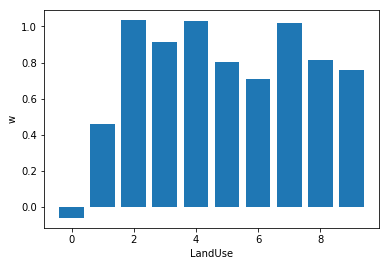

In [65]:
# smoothed coefficients for Landuse 
plt.bar(range(10),w[16:26])
plt.xlabel('LandUse')
plt.ylabel('w')
plt.show()

From the plot, classify landuse into {0}{1}{2,4,7}{3,5,6,8,9}

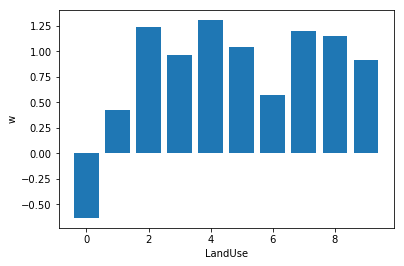

In [66]:
# original coefficients for LandUse
plt.bar(range(10),regr.coef_[16:26])
plt.xlabel('LandUse')
plt.ylabel('w')
plt.show()

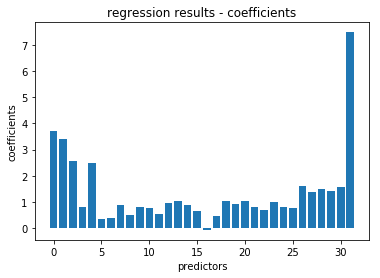

In [67]:
coef_plot(w)

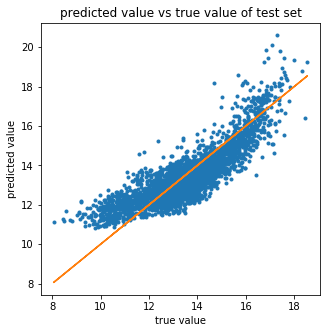

In [68]:
pred_value_plot(Y_test,Y_test_pred)

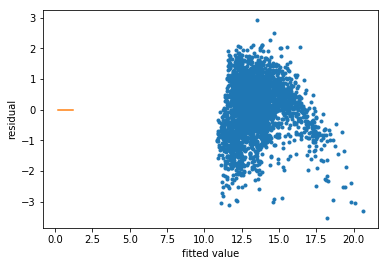

In [69]:
residual_plot(Y_test,Y_test_pred)

## l2 loss, ridge reg

In [70]:
# stepsize for proximal gradient
U,s,V = np.linalg.svd(X)
step = 1.0/(2.0*np.square(s[0]))
# initial w
w0 = np.zeros(np.shape(X)[1])

In [71]:
# ridge proximator
def prox_ridge(stepsize,alpha,z):
    return z/(2.0*stepsize*alpha+1)
# l2_ridge objective value
def l2_ridge(w,X,Y,alpha):
    return mean_squared_error(Y,np.dot(X,w)) + alpha*np.square(np.linalg.norm(w))
# l2_ridge proximal gradient method
def proxi_grad_l2_ridge(X,Y,alpha,maxiters=50,stepsize=step,w=w0):
    obj = []
    for i in range(maxiters):
        g = 2.0*np.dot(X.T,np.dot(X,w)-Y)
        z = w - stepsize*g
        w = prox_ridge(stepsize,alpha,z)
        obj.append(l2_ridge(w,X,Y,alpha))
    return obj,w

In [72]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
alpha_list = [0.001,0.01,0.1,1.0,3.0,6.0,10.0,30.0,60.0,100.0,1000.0]
error = np.zeros(len(alpha_list))
for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        obj,w = proxi_grad_l2_ridge(Xv_train,Yv_train,alpha)
        error[i] += mean_squared_error(Yv_test,np.dot(Xv_test,w))
error = error/(K*1.0)
error

array([ 1.0208,  1.0208,  1.0208,  1.0212,  1.0219,  1.0231,  1.0247,
        1.0329,  1.0465,  1.0667,  1.9076])

In [73]:
obj,w = proxi_grad_l2_ridge(X,Y,alpha_list[np.argmin(error)],maxiters=500)
Y_test_pred = np.dot(X_test,w)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

mean_squared_error test: 0.7559


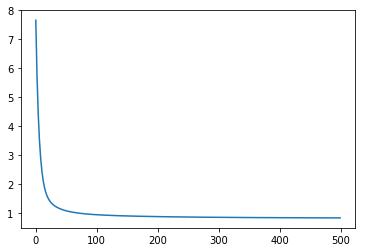

In [74]:
plt.plot(range(500),obj)
plt.show()

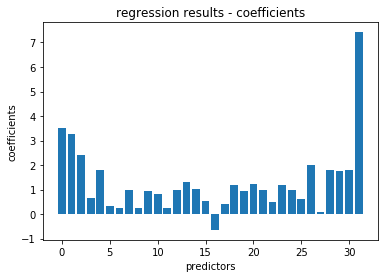

In [75]:
coef_plot(w)

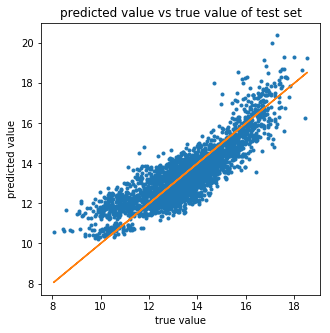

In [76]:
pred_value_plot(Y_test,Y_test_pred)

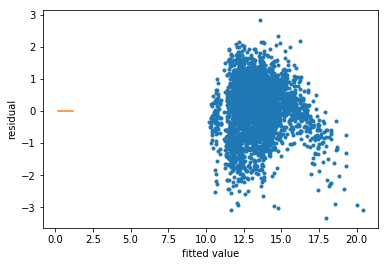

In [77]:
# residual = true - fitted
residual_plot(Y_test,Y_test_pred)

## Huber,ridge

In [85]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
epsilon_list = [2.0,3.0,4.0,5.0,6.0]
error = np.zeros(len(epsilon_list))
for i in range(len(epsilon_list)):
    huber = linear_model.HuberRegressor(epsilon=epsilon_list[i], max_iter=100, alpha=0)
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        huber.fit(Xv_train,Yv_train)
        error[i] += mean_squared_error(Yv_test,huber.predict(Xv_test))
error = error/(K*1.0)
error

array([ 0.6928,  0.6923,  0.6923,  0.6923,  0.6923])

In [86]:
huber = linear_model.HuberRegressor(epsilon=epsilon_list[np.argmin(error)], max_iter=100, alpha=0)
# lasso = linear_model.Lasso(alpha=alpha_list[np.argmin(error)], fit_intercept=False, normalize=False, max_iter=5000)
huber.fit(X,Y)
Y_test_pred = huber.predict(X_test)
mean_squared_error(Y_test,Y_test_pred)

0.73864861550915017

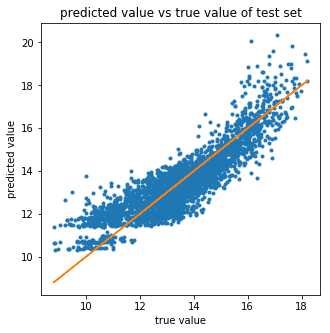

In [73]:
pred_value_plot(Y_test,Y_test_pred)

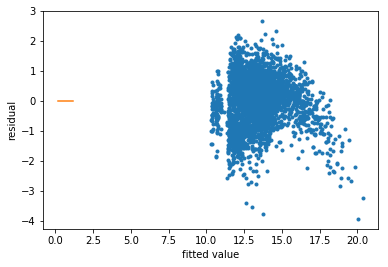

In [74]:
residual_plot(Y_test,Y_test_pred)

## two parts

In [92]:
t = 14

X1 = np.squeeze(X[np.where(Y<=t),:])
X2 = np.squeeze(X[np.where(Y>t),:])
Y1 = Y[np.where(Y<=t)]
Y2 = Y[np.where(Y>t)]
X_test1 = np.squeeze(X_test[np.where(Y_test<=t),:])
X_test2 = np.squeeze(X_test[np.where(Y_test>t),:])
Y_test1 = Y_test[np.where(Y_test<=t)]
Y_test2 = Y_test[np.where(Y_test>t)]

In [ ]:
# # n-th fold cross validation
# K = 10
# kf = KFold(n_splits = K)
# epsilon_list = [2.0,3.0,4.0,5.0,6.0]
# error = np.zeros(len(epsilon_list))
# for i in range(len(epsilon_list)):
#     huber = linear_model.HuberRegressor(epsilon=epsilon_list[i], max_iter=100, alpha=0.001)
#     for train_index, test_index in kf.split(X1):
#         Xv_train,Xv_test = X1[train_index],X1[test_index]
#         Yv_train,Yv_test = Y1[train_index],Y1[test_index]
#         huber.fit(Xv_train,Yv_train)
#         error[i] += mean_squared_error(Yv_test,huber.predict(Xv_test))
# error = error/(K*1.0)
# error

In [93]:
# l2 loss, no regularizor
w1 = np.dot(np.linalg.pinv(X1),Y1)
w2 = np.dot(np.linalg.pinv(X2),Y2)
Y_test1_pred = np.dot(X_test1,w1)
Y_test2_pred = np.dot(X_test2,w2)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test1,Y_test1_pred))
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test2,Y_test2_pred))
print 

mean_squared_error test: 0.5277
mean_squared_error test: 0.2555


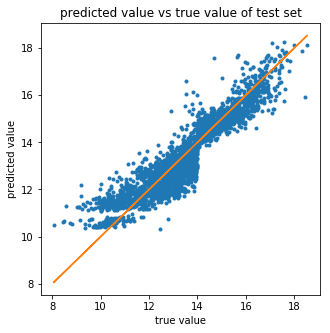

In [94]:
pred_value_plot(np.hstack((Y_test1,Y_test2)),np.hstack((Y_test1_pred,Y_test2_pred)))

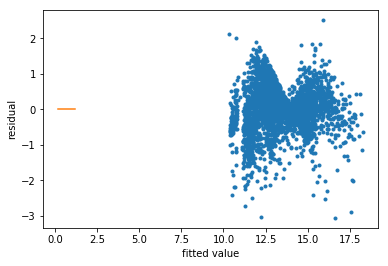

In [95]:
residual_plot(np.hstack((Y_test1,Y_test2)),np.hstack((Y_test1_pred,Y_test2_pred)))